# HW#8 Fashion MNIST with 3-layer-MLP
> 2022094093 Kim Dohoon, Dept of Data Science

- Dense(Hidden) - Dropout - Dense(Output)
    - Nadam Optimizer (learning rate : 0.0005)
    - Sparse Categorical Cross Entropy (reduction : SUM_OVER_BATCH_SIZE)
    - Dropout 0.1
    - batch_size = 1000
 

In [13]:
# Modules
import tensorflow as tf
import numpy as np
from keras import layers
import numpy as np
import random as rn
from keras.models import Sequential
import matplotlib.pylab as plt
from keras.utils import np_utils

###### Do not modify ######
np.random.seed(1)
tf.random.set_seed(1)
rn.seed(1)
###########################

In [17]:
# Initial Setting

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(60000, -1).astype(np.float32)
test_images = test_images.reshape(10000, -1).astype(np.float32)
train_images, test_images = train_images/255.0, test_images/255.0
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

num_pixels = train_images.shape[1]  # 28 * 28 = 784

# To get best model, use Callback
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath='model_best.hdf5',
    verbose = 1,
    save_best_only=True,
    monitor='val_accuracy')

In [18]:
# Dropout Model
model_Dropout = Sequential()

model_Dropout.add(layers.Dense(num_pixels*6, input_dim=num_pixels, activation='relu'))
model_Dropout.add(layers.Dropout(0.2))
model_Dropout.add(layers.Dense(10, activation='softmax'))

# See how model was built
model_Dropout.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4704)              3692640   
                                                                 
 dropout_5 (Dropout)         (None, 4704)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                47050     
                                                                 
Total params: 3,739,690
Trainable params: 3,739,690
Non-trainable params: 0
_________________________________________________________________


In [19]:
nadam = tf.keras.optimizers.Nadam(learning_rate=0.0005)
scce = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction = tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
)

model_Dropout.compile(optimizer=nadam,
              loss=scce,
              metrics=['accuracy'])

dropout_history = model_Dropout.fit(
        train_images, train_labels,
        epochs=300,
        batch_size=1000,
        validation_data = (test_images, test_labels),
        callbacks=[checkpointer])

Epoch 1/300
59/60 [============================>.] - ETA: 0s - loss: 0.7667 - accuracy: 0.7417
Epoch 1: val_accuracy improved from -inf to 0.81850, saving model to model_best.hdf5
60/60 [==============================] - 1s 16ms/step - loss: 0.7624 - accuracy: 0.7432 - val_loss: 0.5208 - val_accuracy: 0.8185
Epoch 2/300
57/60 [===========================>..] - ETA: 0s - loss: 0.4860 - accuracy: 0.8274
Epoch 2: val_accuracy improved from 0.81850 to 0.82750, saving model to model_best.hdf5
60/60 [==============================] - 1s 13ms/step - loss: 0.4832 - accuracy: 0.8287 - val_loss: 0.4831 - val_accuracy: 0.8275
Epoch 3/300
57/60 [===========================>..] - ETA: 0s - loss: 0.4210 - accuracy: 0.8506
Epoch 3: val_accuracy improved from 0.82750 to 0.84800, saving model to model_best.hdf5
60/60 [==============================] - 1s 13ms/step - loss: 0.4201 - accuracy: 0.8510 - val_loss: 0.4195 - val_accuracy: 0.8480
Epoch 4/300
57/60 [===========================>..] - ETA: 0s - l

313/313 - 1s - loss: 0.6452 - accuracy: 0.9071 - 786ms/epoch - 3ms/step
________________________________________________________________




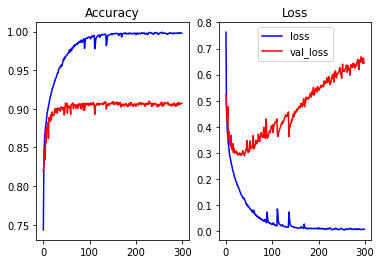

In [22]:
# Evaluate Model / Show Accuracy & Loss
test_loss, test_acc = model_Dropout.evaluate(test_images, test_labels, verbose=2)
print("________________________________________________________________\n\n")
plt.title("accuracy for the training data")
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(dropout_history.history["accuracy"], 'b', label='accuracy')
plt.plot(dropout_history.history['val_accuracy'],'r', label='val_accuracy')
plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(dropout_history.history["loss"], 'b', label='loss')
plt.plot(dropout_history.history['val_loss'],'r', label='val_loss')
plt.legend()

In [23]:
# Load best model
load_model = tf.keras.models.load_model('model_best.hdf5')
load_model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 0.5862 - accuracy: 0.9100 - 658ms/epoch - 2ms/step


[0.5861937999725342, 0.9100000262260437]

In [ ]:
from google.colab import files
files.download("dropout_model_best.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>